# Simulation et Monte Carlo

In [6]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Données angulaires 

Une loi classique pour des données correspondant à des angles observés sur l’intervalle [−π, π] est la loi de von Mises, de densité: $ π(θ) = \frac{1}{Z(κ)} exp(κ cos(θ − µ))$ où κ > 0, µ ∈ [−π, π], et Z(κ) est une constante de normalisation qui n’admet pas d’expression explicite. Cette loi est souvent qualifiée de loi normale pour les angles, car $cos(θ) ≈ 1 − θ^2$

### 1. Algorithme acceptation-rejet

In [7]:
def gen_uni_pi(n=1):
    return np.random.uniform(-np.pi, np.pi, n)

In [8]:
def unipi_density(x) :
    if x <= np.pi and x >= -np.pi:
        return 1/(2*np.pi)
    else:
        return 0
    
v_unipi_density = np.vectorize(unipi_density)

def von_mises_density(x, mu=0, kappa=1):
    return np.exp(kappa * np.cos(x - mu))

In [9]:
y = np.linspace(-np.pi, np.pi)

M = np.max(von_mises_density(y, mu=0, kappa=1)/v_unipi_density(y))

In [10]:
M

17.044412870709813

In [11]:
def von_mises_ra():
    while True :
        x = gen_uni_pi()
        M = 17.1
        u = rd.random()

        if u <= (1/M)*von_mises_density(x)/(unipi_density(x)):
            return x 

<AxesSubplot:>

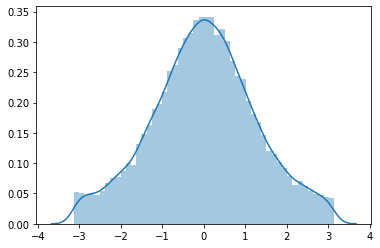

In [12]:
sns.distplot([von_mises_ra() for i in range(20000)])

### Performance en fonction de kappa et mu

In [20]:
def von_mises_unif_acceptance(kappa=1., mu=0,  n=100_000):
    """ This function estimates the acceptance rate according to a uniform distribution
    as proposal distribution.

    :param float kappa: kappa
    :param int n: number of simulations

    :return float: estimation of the acceptance rate in percentage
    """

    # Compute a uniform on [-pi, pi]
    sample = gen_uni_pi(n=n)
    sample = sample - mu

    # Compute the value for the rejection test
    val = np.exp(kappa * (np.cos(sample) - 1))

    # Acceptance step
    von_mises = sample[np.random.uniform(0, 1, n) <= val]
    return 100 * von_mises.shape[0] / n

In [21]:
von_mises_unif_acceptance(kappa=1, n= 100000)

46.615

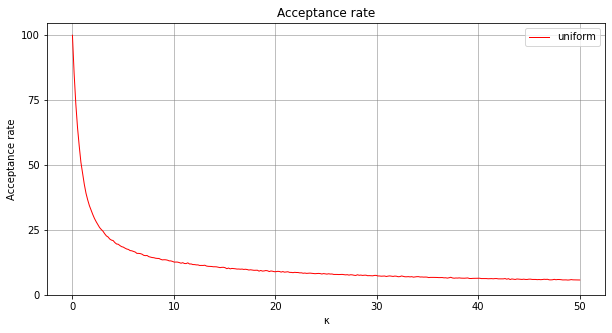

In [19]:
# Plot 

kappa = np.linspace(0, 50, 300)
n = 100000

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(kappa, [von_mises_unif_acceptance(kappa=val, n=n) for val in kappa], 'r-', lw=1, label='uniform')
ax.set_yticks([0, 25, 50, 75, 100])
ax.grid(True, linewidth=0.5, color='grey', linestyle='-')
ax.set_xlabel("\u03BA")
ax.set_ylabel("Acceptance rate")
ax.set_title("Acceptance rate")
plt.legend()
plt.show()

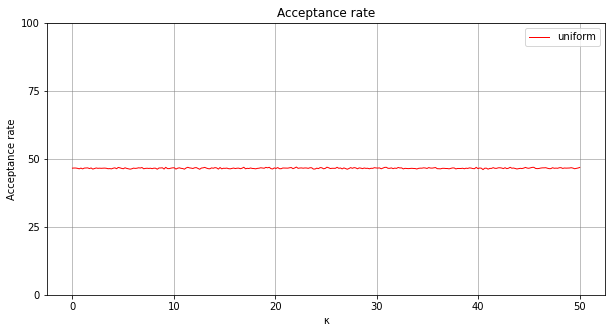

In [23]:
kappa1 = 1
mu = np.linspace(0, 50, 300)
n = 100000

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(kappa, [von_mises_unif_acceptance(kappa1, mu=val,n=n) for val in mu], 'r-', lw=1, label='uniform')
ax.set_yticks([0, 25, 50, 75, 100])
ax.grid(True, linewidth=0.5, color='grey', linestyle='-')
ax.set_xlabel("\u03BA")
ax.set_ylabel("Acceptance rate")
ax.set_title("Acceptance rate")
plt.legend()
plt.show()

### 2. Algorithme de Metropolis

Proposer un algorithme de Metropolis simple pour simuler selon une telle loi; notamment proposer une règle simple pour que 
la performance de l’algorithme ne dépende pas des paramètres. 
(Expliquer ce que veut dire le mot “performance” pour un tel algorithme.)

Contrairement à l'algorithme de rejet, MCMC crée des va qui ne sont pas indépendantes les unes des autres